In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [8]:
def create(N, chance):
    ocean = np.random.choice(a = [0,1,2,3], size = (N,N), p = list(chance))
    return ocean

ocean = create(N=50, chance = (0.21, 0.15, 0.32, 0.32))
print(ocean)

[[0 1 2 ... 2 0 2]
 [2 3 3 ... 3 0 1]
 [2 3 2 ... 1 0 1]
 ...
 [2 0 2 ... 0 3 2]
 [0 2 0 ... 3 0 3]
 [2 3 3 ... 3 2 1]]


In [9]:
def get_neigh(x, y, ocean, N):
    fish_count = 0
    shrimp_count = 0
    for i in range(-1,2):
        for j in range(-1,2):
            k = x+i
            l = y+j
            if k < 0 or l < 0 or k >= N or l >= N or (k==x and l == y):
                continue
            if ocean[k,l] == 2:
                fish_count+=1
            if ocean[k,l] == 3:
                shrimp_count+=1
    return [fish_count, shrimp_count]
    
def next_step(ocean, prot_ocean, N):
    for i in range(N):
        for j in range(N):
            a = get_neigh(i,j,prot_ocean,N)
            if prot_ocean[i, j] == 0:
                if a[0] == 3:
                    ocean[i, j] = 2
                elif a[1] == 3:
                    ocean[i, j] = 3
            if prot_ocean[i, j] == 2:
                if a[0] > 3 or a[0] < 2:
                    ocean[i, j] = 0
            if prot_ocean[i, j] == 3:
                if a[1] > 3 or a[1] < 2:
                    ocean[i, j] = 0
    return ocean

[Text(1, 0, 'empty'),
 Text(1, 1, 'rock'),
 Text(1, 2, 'fish'),
 Text(1, 3, 'shrimp')]

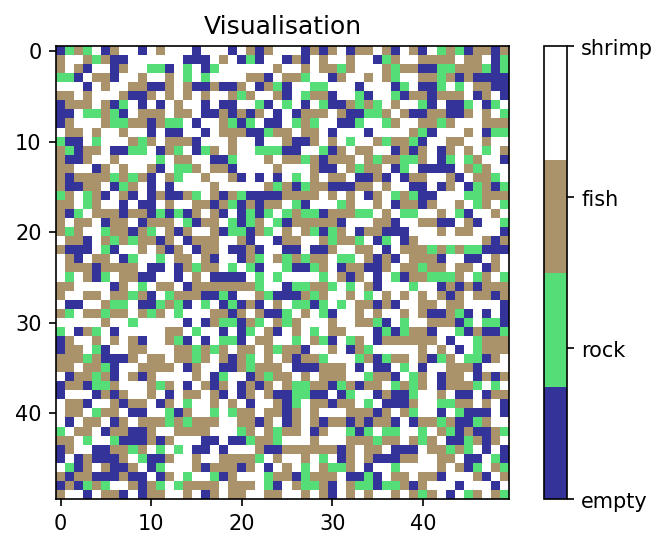

In [10]:
rc('animation', html='html5')
fig = plt.figure(dpi=150);
im = plt.imshow(ocean, cmap=plt.cm.get_cmap('terrain', 4), animated=True)
plt.title('Visualisation')
cbar = fig.colorbar(im, ticks=range(4))
cbar.ax.set_yticklabels(['empty', 'rock', 'fish', 'shrimp'])

In [11]:
def init():
    global ocean
    ocean = create(N=50, chance = (0.21, 0.15, 0.32, 0.32))
    im.set_data(ocean)
    return (im,)

def animate(i):
    global ocean
    im.set_data(ocean)
    ocean = next_step(ocean, prot_ocean = np.copy(ocean), N = 50)
    return (im,)

anim = animation.FuncAnimation(
    fig,
    animate,
    frames=50,
    init_func=init,
    interval=500,
    blit=True
)


In [12]:
HTML(anim.to_html5_video())